<a href="https://colab.research.google.com/github/KevinTsaiCodes/CS567/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


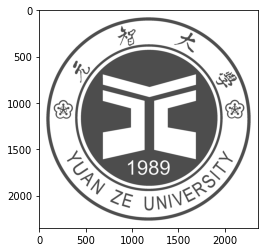

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

olho = plt.imread('yzu.png')
olho_verde = olho[:, :, 1]

teste = np.copy(olho_verde)

if teste.dtype == np.uint16:
    depth = 65536
else:
    depth = 256

height, width = teste.shape

incidencia = np.zeros((teste.size))
ocorrencia = np.zeros(depth)
k = 0
for i in range(height):
    for j in range(width):
        incidencia[k] = teste[i, j]
        k = k + 1
count = 0

for j in range(len(incidencia)):
    ocorrencia[int(incidencia[j])] += 1

acumulado = np.zeros(depth)
count = 0
for i in range(depth):
    count += ocorrencia[i]
    acumulado[i] = count

constante = (depth-1) / (height * width)

for i in range(depth):
    acumulado[i] = round(acumulado[i] * constante, 0)

equaliza = np.copy(olho_verde)
i1, j1 = np.nonzero(equaliza)

for j in range(len(i1)):
    equaliza[i1[j], j1[j]] = acumulado[int(equaliza[i1[j], j1[j]])]

equaliza = equaliza.astype("uint8")
equaliza = np.stack((equaliza,) * 3, axis=-1)

plt.imshow(equaliza)
plt.show()

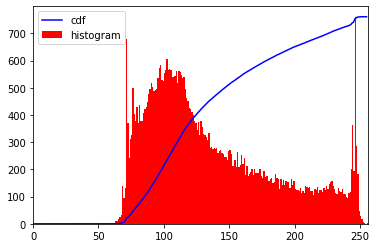

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('d.jfif',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
img2 = cdf[img]

In [ ]:
img = cv.imread('d.jfif',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('Res1.png',res)

True

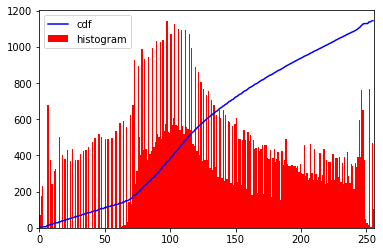

In [ ]:
img = cv.imread('Res1.png',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()